In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

pd.set_option('display.max_rows', 100)
pd.set_option('precision', 2)
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

# Load a dataset downloaded from Kaggle, avocado prices
avos = pd.read_csv("avocado.csv")

# Cursory look at it
num_of_rows, num_of_cols = avos.shape
print(f"The dataframe shape is: {num_of_cols} columns by {num_of_rows} rows")

The dataframe shape is: 14 columns by 18249 rows


In [44]:
avos.head(3)     # See if renaming columns makes sense

,Unnamed: 0,Date,AvgPrice,Total Volume,Small Hass,Large Hass,XL Hass,Total Bags,Small Bags,Large Bags,XL Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [3]:
# Renaming these to be meaningful (referenced from the Avocado Board site)
avos.rename(columns={'AveragePrice':'AvgPrice',
                     '4046':'Small Hass',
                     '4225':'Large Hass',
                     '4770':'XL Hass',
                     'XLarge Bags':'XL Bags'}, inplace=True)

In [45]:
# the 'Unnamed: 0' column has no meaning, and is always 0-51, matched with the region (52 occurrences of each)
# making a new dataframe without the unused column
cols = avos.columns[1:]
avocados = pd.DataFrame(avos[cols])
avocados.head(3)

,Date,AvgPrice,Total Volume,Small Hass,Large Hass,XL Hass,Total Bags,Small Bags,Large Bags,XL Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [5]:
# just have a look at summary statistics for relevant columns
#avos.iloc[:, 2:11].describe(include='all')
avocados.iloc[:, 1:9].describe(include='all')

,AvgPrice,Total Volume,Small Hass,Large Hass,XL Hass,Total Bags,Small Bags,Large Bags
count,18249.00,1.82e+04,1.82e+04,1.82e+04,1.82e+04,1.82e+04,1.82e+04,1.82e+04
mean,1.41,8.51e+05,2.93e+05,2.95e+05,2.28e+04,2.40e+05,1.82e+05,5.43e+04
std,0.40,3.45e+06,1.26e+06,1.20e+06,1.07e+05,9.86e+05,7.46e+05,2.44e+05
min,0.44,8.46e+01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
25%,1.10,1.08e+04,8.54e+02,3.01e+03,0.00e+00,5.09e+03,2.85e+03,1.27e+02
50%,1.37,1.07e+05,8.65e+03,2.91e+04,1.85e+02,3.97e+04,2.64e+04,2.65e+03
75%,1.66,4.33e+05,1.11e+05,1.50e+05,6.24e+03,1.11e+05,8.33e+04,2.20e+04
max,3.25,6.25e+07,2.27e+07,2.05e+07,2.55e+06,1.94e+07,1.34e+07,5.72e+06


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


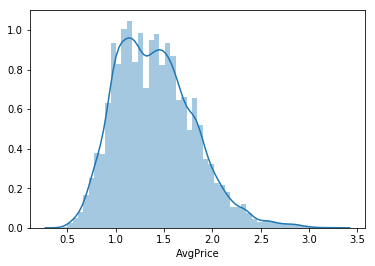

In [6]:
sns.distplot(avocados['AvgPrice']);

Super basic, but the improvement from Seaborn is evident, with the defaults even!  Obviously this could use a lot more detail and polishing.

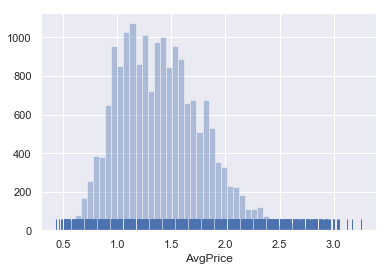

In [7]:
# reset to defaults, and do rug plot as well
sns.set()
sns.distplot(avocados['AvgPrice'], bins=50, kde=False, rug=True);

Same thing, but with a rug plot rather than KDE.  I also reset to show the darkgrid, rather than the white above.  In the right context, this would be the way to go.  I like that Seaborn has various presentation modes, depending on what you're doing.

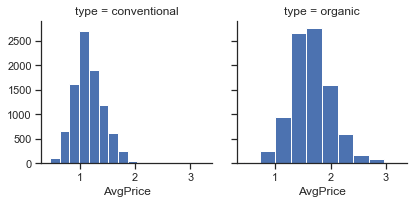

In [8]:
sns.set(style="ticks")
g = sns.FacetGrid(avocados, col="type")
g.map(plt.hist, "AvgPrice");

And break it out by type (conventional vs. organic); Again, super easy to get a relatively nice set of visualizations.  Digging into matplotlib simultaneously to control the particulars of each subplot would be quite powerful.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


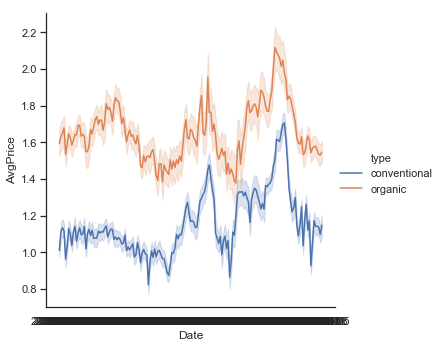

In [9]:
sns.set_style({'xtick.bottom': False})
g = sns.relplot(x="Date", y="AvgPrice", hue="type", kind="line", data=avocados)
#sns.axes_style()

I LOVE the way the author has extra parameters available that will automatically plot another variable!  Again, tweaking and polishing, you could get this looking really good.  Obvious defaults and large amount of data in my 'Date' variable makes the bottom unreadable, but I'm sure you can reset the sample rate lower.

In [46]:
# just to see my variables again
avocados.head(3)

,Date,AvgPrice,Total Volume,Small Hass,Large Hass,XL Hass,Total Bags,Small Bags,Large Bags,XL Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


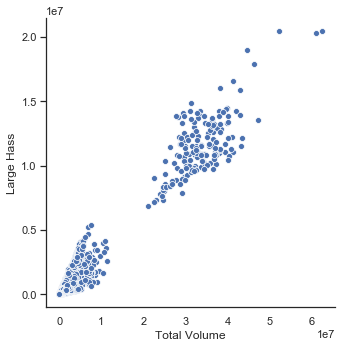

In [11]:
# plotting 2 continuous variables now: Total Volume and Large Hass
sns.relplot(x="Total Volume", y="Large Hass", data=avocados);

If I made this larger, would be better (but interesting distribution).  Too many data points in my opinion, would likely be better served by a different style plot.

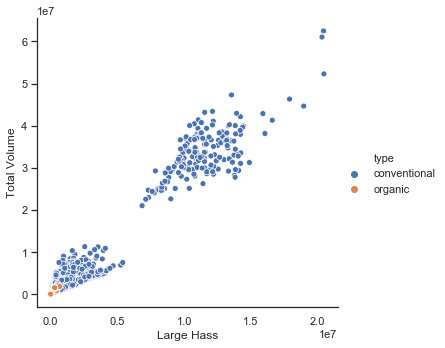

In [12]:
# reversed x and y for fun, and showing type too
sns.relplot(x="Large Hass", y="Total Volume", hue="type", data=avocados);

Same thing but with organic thrown in; basically they get lost, but gives a good idea of what a small portions the organic avocados represent.  I'd be curious about profitability.

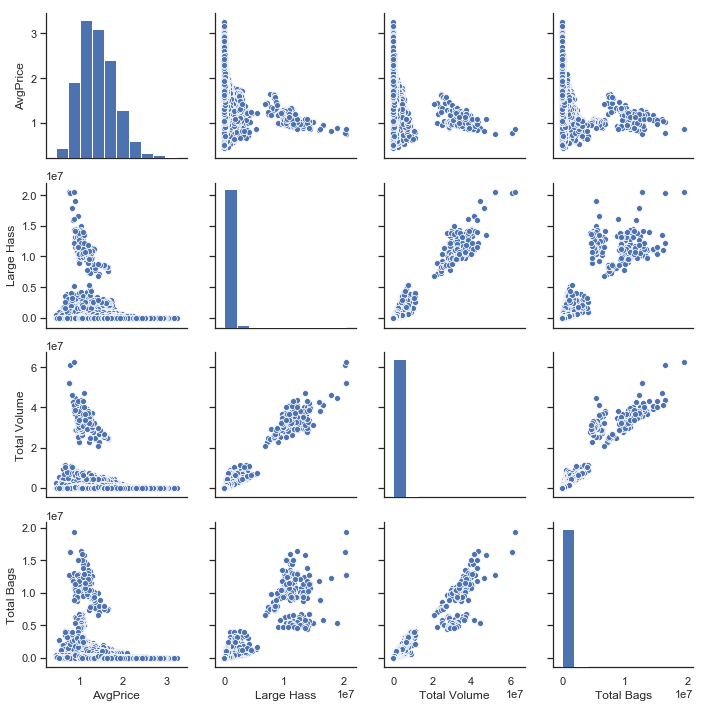

In [13]:
# This gets a bit confusing (and obviously I added in a couple more variables); still, shows where you can go
# partly it's difficult because of the large number of datapoints
sns.pairplot(avocados[['AvgPrice', 'Large Hass', 'Total Volume', 'Total Bags']])

This needs to be polished.  Wonderful that an easy way to do pairplots is offered though.  This data set doesn't really look very good in this set of plots.  Some look like the outline of New Zealand )

Text(0.5,1,'Total Bags per region')

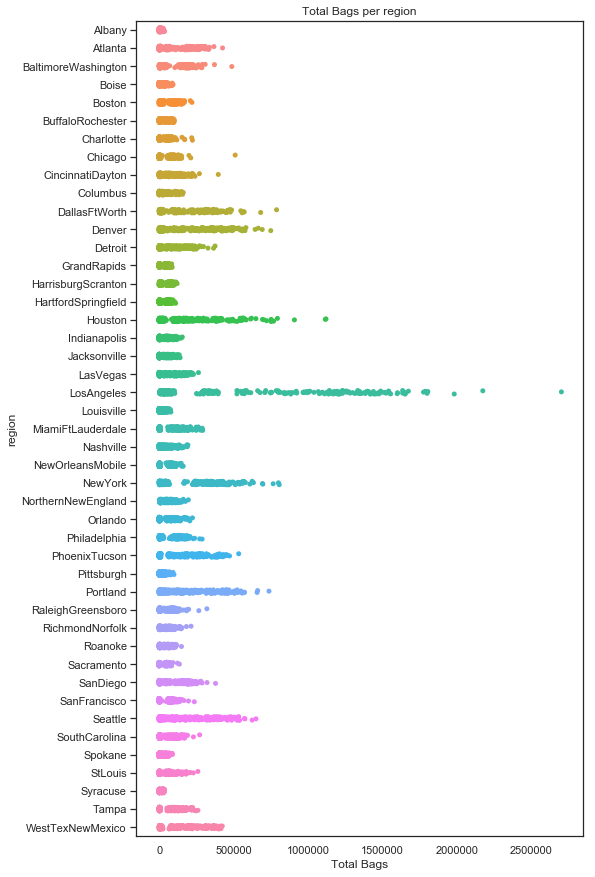

In [14]:
fig, ax = plt.subplots(figsize=[8, 15])
sns.stripplot(
    data=avocados,
    y=avocados.loc[(avocados["region"] != "TotalUS") &
                   (avocados["region"] != "West") &
                   (avocados["region"] != "Southeast") &
                   (avocados["region"] != "SouthCentral") &
                   (avocados["region"] != "Northeast") &
                   (avocados["region"] != "Midsouth") &
                   (avocados["region"] != "GreatLakes") &
                   (avocados["region"] != "Plains") &
                   (avocados["region"] != "California"), "region"],
    x='Total Bags'
)
ax.set_title('Total Bags per region')

I filtered out the regions and tried to keep it at a metro area level.  Automatic color gradation, really nice, as well as easy control of the overall size/shape.

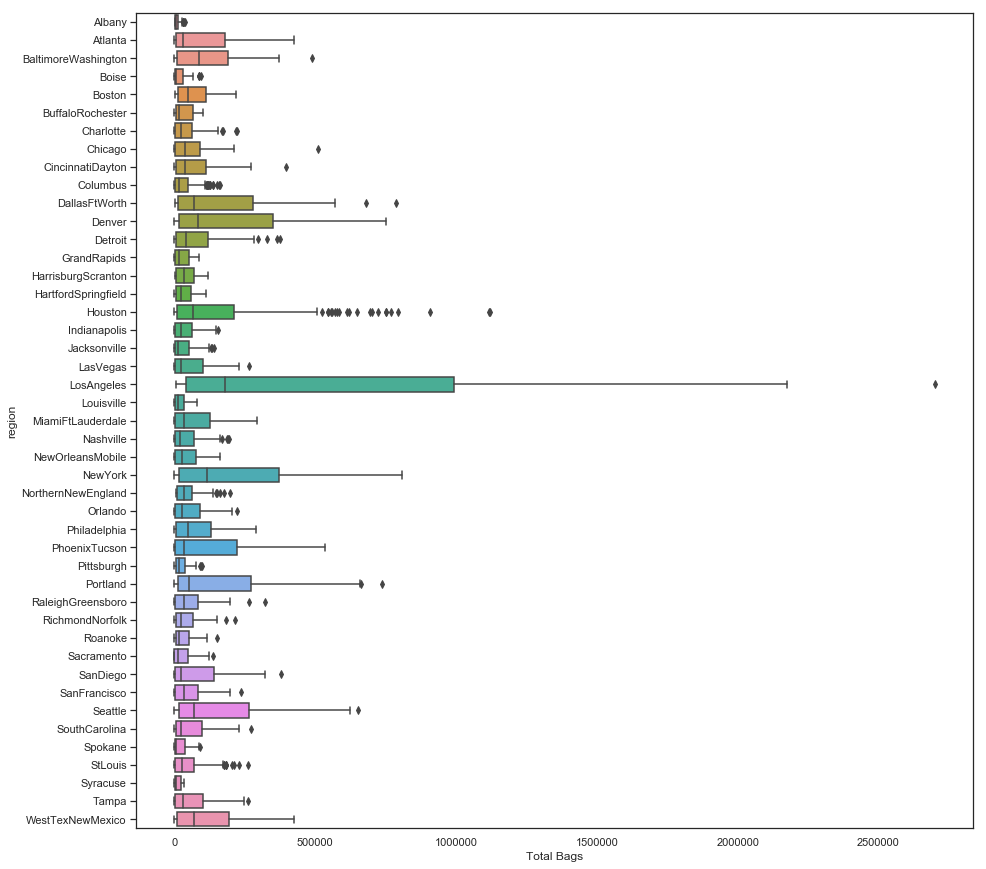

In [15]:
fig, ax = plt.subplots(figsize=[15, 15])
sns.boxplot(
    data=avocados,
    y=avocados.loc[(avocados["region"] != "TotalUS") &
                   (avocados["region"] != "West") &
                   (avocados["region"] != "Southeast") &
                   (avocados["region"] != "SouthCentral") &
                   (avocados["region"] != "Northeast") &
                   (avocados["region"] != "Midsouth") &
                   (avocados["region"] != "GreatLakes") &
                   (avocados["region"] != "Plains") &
                   (avocados["region"] != "California"), "region"],
    x='Total Bags'
)

Same thing, different plot.  This would work much better with a different data set, fewer regions (or whatever that may mean in different data).  This is just too much for the eye, and would be better broken into several plots possibly.

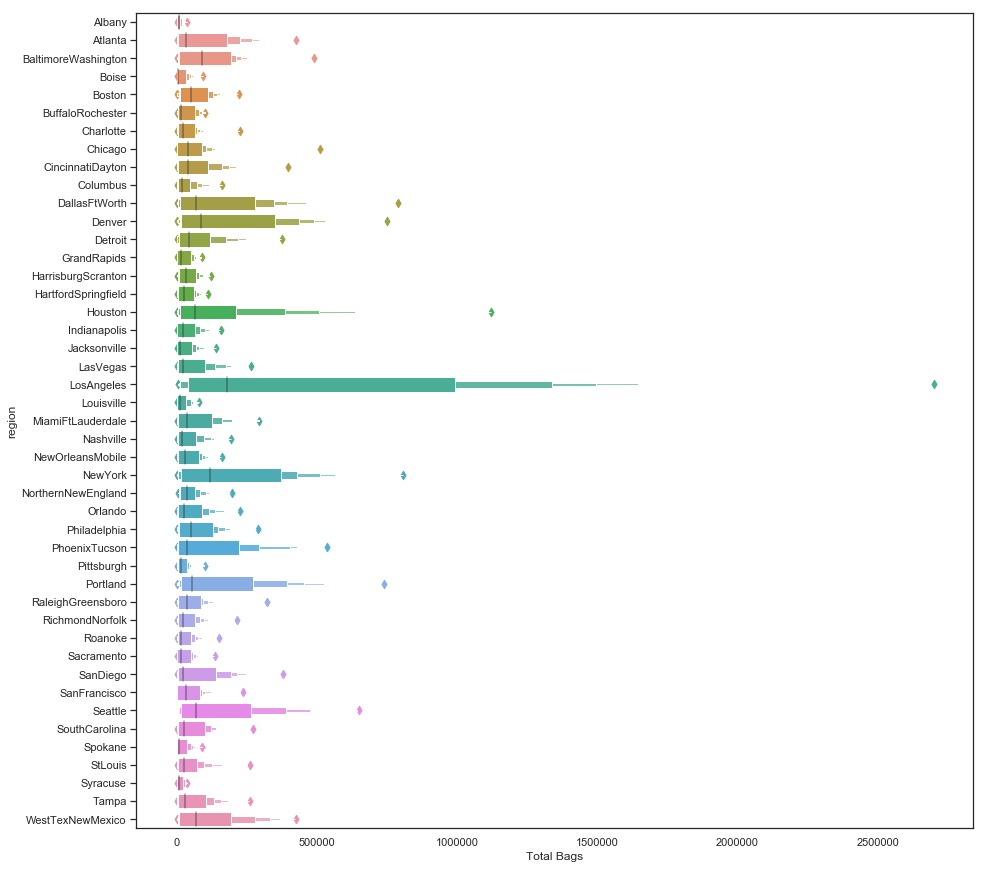

In [16]:
fig, ax = plt.subplots(figsize=[15, 15])
sns.boxenplot(
    data=avocados,
    y=avocados.loc[(avocados["region"] != "TotalUS") &
                   (avocados["region"] != "West") &
                   (avocados["region"] != "Southeast") &
                   (avocados["region"] != "SouthCentral") &
                   (avocados["region"] != "Northeast") &
                   (avocados["region"] != "Midsouth") &
                   (avocados["region"] != "GreatLakes") &
                   (avocados["region"] != "Plains") &
                   (avocados["region"] != "California"), "region"],
    x='Total Bags'
)

And again; I really like this style of marker, a bit more than the box/whisker plot, but I'm curious what people in the industry feel.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


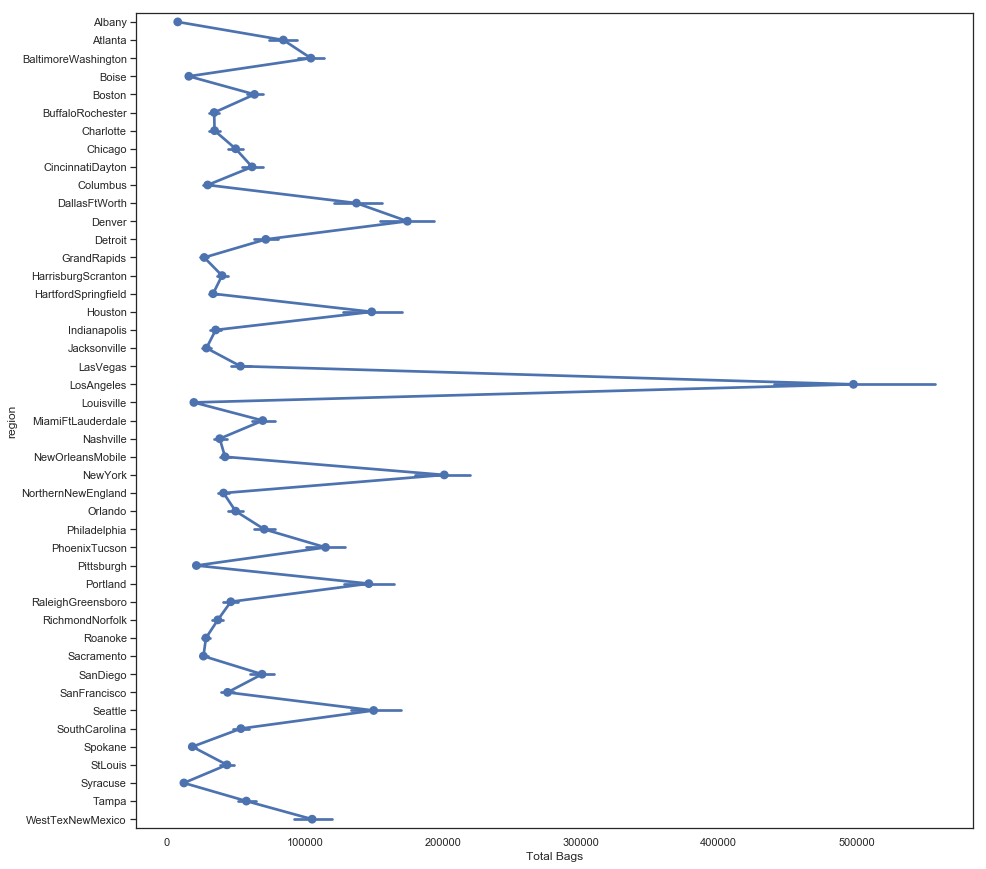

In [18]:
fig, ax = plt.subplots(figsize=[15, 15])
sns.pointplot(
    data=avocados,
    y=avocados.loc[(avocados["region"] != "TotalUS") &
                   (avocados["region"] != "West") &
                   (avocados["region"] != "Southeast") &
                   (avocados["region"] != "SouthCentral") &
                   (avocados["region"] != "Northeast") &
                   (avocados["region"] != "Midsouth") &
                   (avocados["region"] != "GreatLakes") &
                   (avocados["region"] != "Plains") &
                   (avocados["region"] != "California"), "region"],
    x='Total Bags'
)

Seems a lot less useful (with this dataset), but refactoring could make it more useful.  Again, I can see quite a few use cases for point plots like this over the dynamite plots.

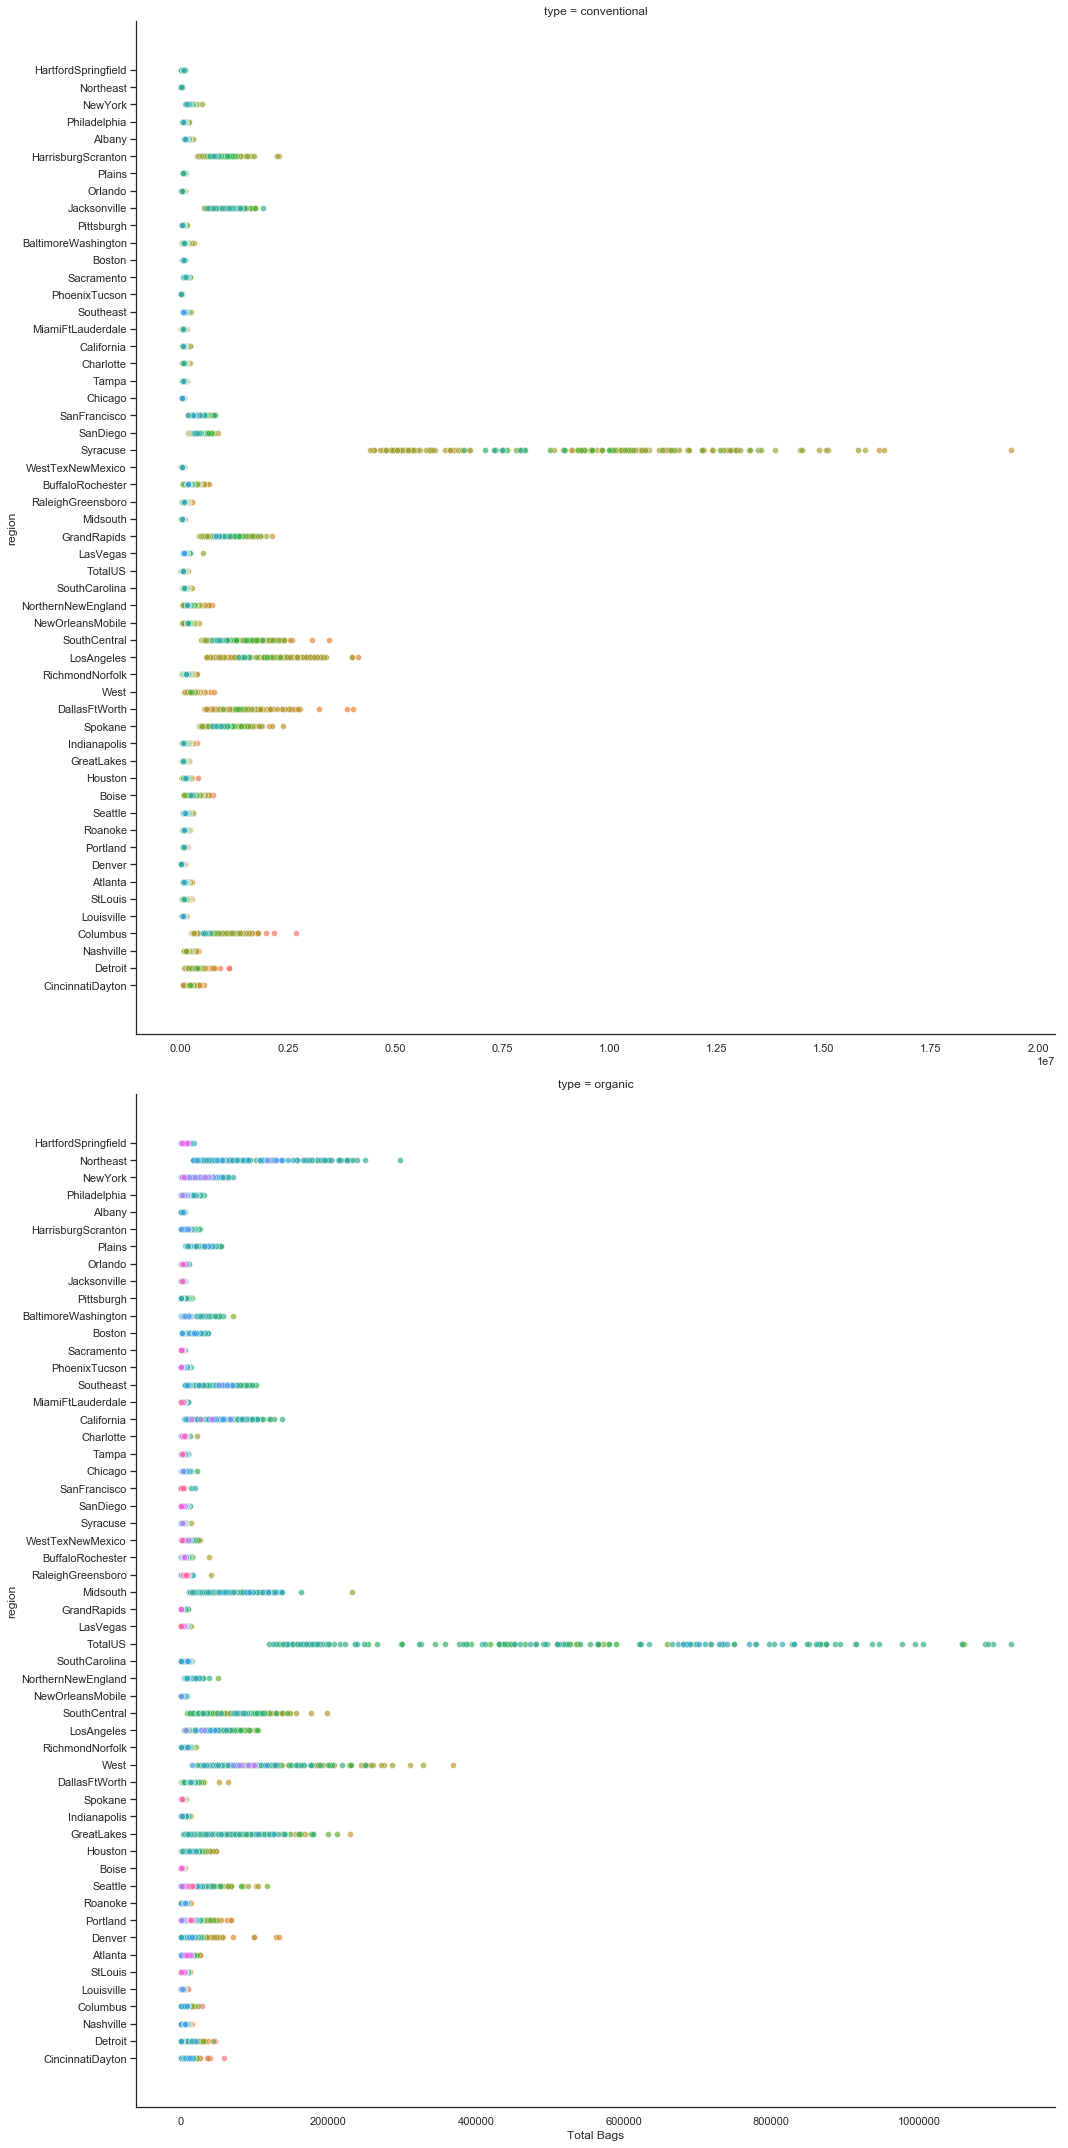

In [43]:
g = sns.FacetGrid(avocados, hue="AvgPrice", row="type", height=15, sharex=False)
g.map(plt.scatter, "Total Bags", "region", alpha=.7, linewidth=.5, edgecolor="white")

Wayyy too busy and crowded, and the color doesn't really make sense.  This needs to be tweaked a lot to make any sense, but I was just playing around to see what would happen.